# Exercise 1
## Group members:
* Antonio Feltrin
* Giosuè Sardo Infirri
* Riccardo Tancredi
* Simone Toso

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout     # Dropout inactivate some neurons on the network
import tensorflow as tf

import matplotlib as mpl
import matplotlib.cm as cm
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

np.seed(123456789)

# number of data
N = 4000
# size of each sample
L = 2
# box size
B = 100

In [2]:
# a nonlinear function of a 2d array x
def f(x):
    r=0
    if x[0]>-25 and x[1]>-35 and x[0]+x[1] < 30:
        r=1
    if x[0]+x[1] > 50:
        r=1
    return r

In [3]:
# just to rescale and work with smaller numbers
def simple_rescaling(z):
    return z/50

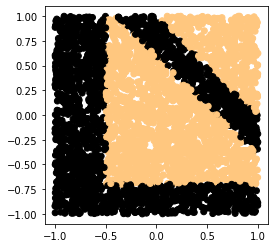

In [42]:
x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = int(f(x[i]))
    
x = simple_rescaling(x)  
plt.figure(figsize = (4,4))
plt.scatter(x[:,0],x[:,1],c=y,cmap=cm.copper)
plt.show()

### Splitting train and test set

In [5]:
N_train = int(N*80/100) #take 80% of data as training
x_train, x_test = x[:N_train], x[N_train:]
y_train, y_test = y[:N_train], y[N_train:]

# 1.

In [6]:
def create_model(activation="relu"):                # model takes as input activation function; will be optimized using gridsearchCV
    model = Sequential()                            # start sequential list of layers
    model.add(Dense(L, input_shape=(L,), activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dropout(0.01))                        # the Dropout is added only to the previous layer
    model.add(Dense(1, activation='sigmoid'))       # 1 to have one single output
    return model
    
# compile model function
def compile_model(optimizer="Adam", activation="relu"):   
    model = create_model(activation)
    model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

In [7]:
epochs = 200
batch_size = 50

### Now let's import the libraries for the GridSearch, use KerasClassifier to see the model with the sklearn libraries and do the GridSearch.

In [8]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
# from scikeras.wrappers import KerasClassifier to avoid DeprecationWarning from TensorFlow

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_split=0.2,
                        verbose=1)

leaky_relu = tf.nn.leaky_relu

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['RMSprop', 'Adam', 'Adamax', 'Nadam']      #, 'Adagrad', 'Adadelta',
activation = [leaky_relu, 'relu', 'elu', 'softmax']     #, 'sigmoid', 
# define parameter dictionary
param_grid = dict(optimizer=optimizer, activation=activation)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train)

Epoch 1/200


C:\Users\Studente\AppData\Local\Temp\ipykernel_11564\2067127906.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=compile_model,


39/39 [==============================] - 1s 4ms/step - loss: 0.6728 - accuracy: 0.6349 - val_loss: 0.6529 - val_accuracy: 0.6187
Epoch 2/200
39/39 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.6594 - val_loss: 0.6141 - val_accuracy: 0.6354
Epoch 3/200
39/39 [==============================] - 0s 1ms/step - loss: 0.5776 - accuracy: 0.6844 - val_loss: 0.5810 - val_accuracy: 0.6812
Epoch 4/200
39/39 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.7130 - val_loss: 0.5581 - val_accuracy: 0.6917
Epoch 5/200
39/39 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.7281 - val_loss: 0.5421 - val_accuracy: 0.7104
Epoch 6/200
39/39 [==============================] - 0s 1ms/step - loss: 0.5154 - accuracy: 0.7328 - val_loss: 0.5322 - val_accuracy: 0.7208
Epoch 7/200
39/39 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.7427 - val_loss: 0.5201 - val_accuracy: 0.7312
Epoch 8/200
39/39 [======

In [9]:
grid_result.cv_results_

{'mean_fit_time': array([11.92438269, 11.95822018, 11.99251449, 12.80333775, 12.57466477,
        12.90489787, 12.70511633, 13.05210501, 12.82916808, 12.97903466,
        12.83979255, 12.98336977, 12.73516637, 12.74219912, 12.50388283,
        12.98238993]),
 'std_fit_time': array([0.33889525, 0.04136791, 0.03124215, 0.03329909, 0.22931248,
        0.15376548, 0.13119675, 0.05989087, 0.09036388, 0.04237786,
        0.27869563, 0.12151473, 0.18509997, 0.16805326, 0.07212203,
        0.03330892]),
 'mean_score_time': array([0.04464597, 0.0716691 , 0.04334909, 0.04581332, 0.04748708,
        0.0452441 , 0.0456301 , 0.04568011, 0.05013114, 0.05159694,
        0.04632747, 0.04627877, 0.04724956, 0.04425216, 0.04409987,
        0.04642016]),
 'std_score_time': array([0.00156894, 0.04624117, 0.00023045, 0.00272545, 0.00395633,
        0.00969586, 0.00040723, 0.00069487, 0.00526851, 0.00848714,
        0.00220402, 0.00245264, 0.00341874, 0.00108864, 0.00154422,
        0.00164586]),
 'param_ac

In [10]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.986563 using {'activation': <function leaky_relu at 0x00000158322088B0>, 'optimizer': 'Nadam'}
0.978125 (0.004193) with: {'activation': <function leaky_relu at 0x00000158322088B0>, 'optimizer': 'RMSprop'}
0.986562 (0.003789) with: {'activation': <function leaky_relu at 0x00000158322088B0>, 'optimizer': 'Adam'}
0.984375 (0.004098) with: {'activation': <function leaky_relu at 0x00000158322088B0>, 'optimizer': 'Adamax'}
0.986563 (0.003891) with: {'activation': <function leaky_relu at 0x00000158322088B0>, 'optimizer': 'Nadam'}
0.918125 (0.058071) with: {'activation': 'relu', 'optimizer': 'RMSprop'}
0.899375 (0.045847) with: {'activation': 'relu', 'optimizer': 'Adam'}
0.853125 (0.020851) with: {'activation': 'relu', 'optimizer': 'Adamax'}
0.882188 (0.019068) with: {'activation': 'relu', 'optimizer': 'Nadam'}
0.963437 (0.020923) with: {'activation': 'elu', 'optimizer': 'RMSprop'}
0.963438 (0.028137) with: {'activation': 'elu', 'optimizer': 'Adam'}
0.884375 (0.022853) with: {'activati

In [11]:
# grid_result.best_estimator_.model.history.history

In [12]:
best_fit = grid_result.best_estimator_.model.history.history
best_params = grid_result.best_params_

In [13]:
best_model_score = grid_result.best_estimator_.score(x_test, y_test)

16/16 [==============================] - 0s 800us/step - loss: 0.0335 - accuracy: 0.9887


In [14]:
best_model = grid_result.best_estimator_

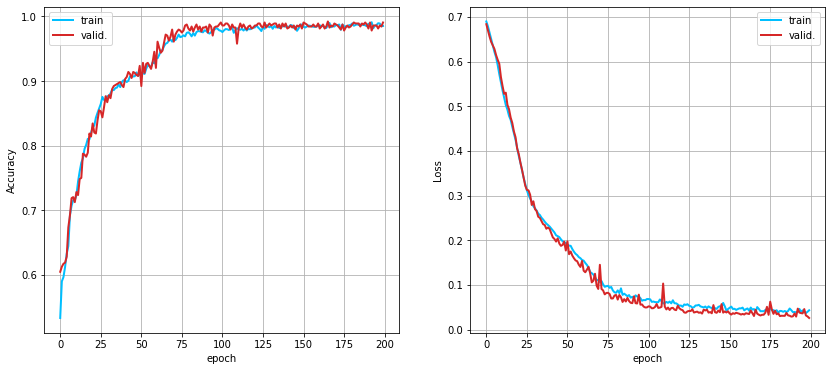

In [20]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(best_fit['accuracy'], label="train", c="deepskyblue", lw=2)
ax.plot(best_fit['val_accuracy'], label="valid.", c="tab:red", lw=2)
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax.grid()
ax=AX[1]
ax.plot(best_fit['loss'], label="train", c="deepskyblue", lw=2)
ax.plot(best_fit['val_loss'], label="valid.", c="tab:red", lw=2)
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid()
plt.show()

In [16]:
dX = 2/50
X1 = np.arange(-1,1+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

pred = best_model.predict(grid)

51 2601
[1. 1.]
82/82 [==============================] - 0s 555us/step


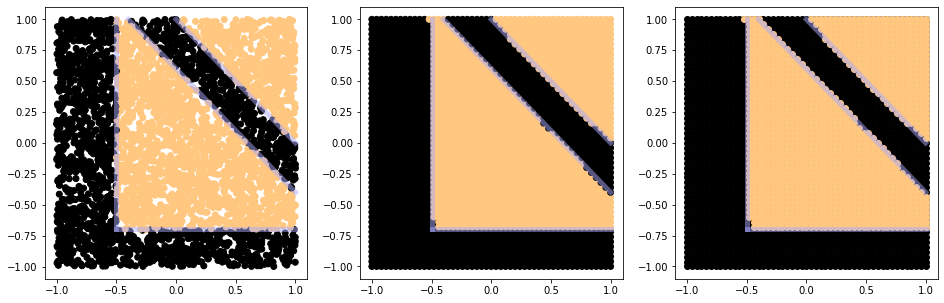

In [21]:
def boundaries():  
    x1=-0.5
    y1=-35/50
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((1,-2/5),(-2/5,1),c=c,alpha=a,lw=lw)
    ax.plot((1,0),(0,1),c=c,alpha=a,lw=lw)
    ax.plot((x1,1),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,1),c=c,alpha=a,lw=lw)
    
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1], c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1], c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
plt.show()

# 2.

## a) & b)

Epoch 1/200
16/16 [==============================] - 1s 20ms/step - loss: 0.6748 - accuracy: 0.6438 - val_loss: 0.6647 - val_accuracy: 0.6150
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.6525 - val_loss: 0.6466 - val_accuracy: 0.6200
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.6550 - val_loss: 0.6365 - val_accuracy: 0.6100
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.6525 - val_loss: 0.6311 - val_accuracy: 0.6100
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.6637 - val_loss: 0.6265 - val_accuracy: 0.6100
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.6600 - val_loss: 0.6224 - val_accuracy: 0.6150
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.6700 - val_loss: 0.6179 - val_accuracy: 0.6150
Epoch 8/200


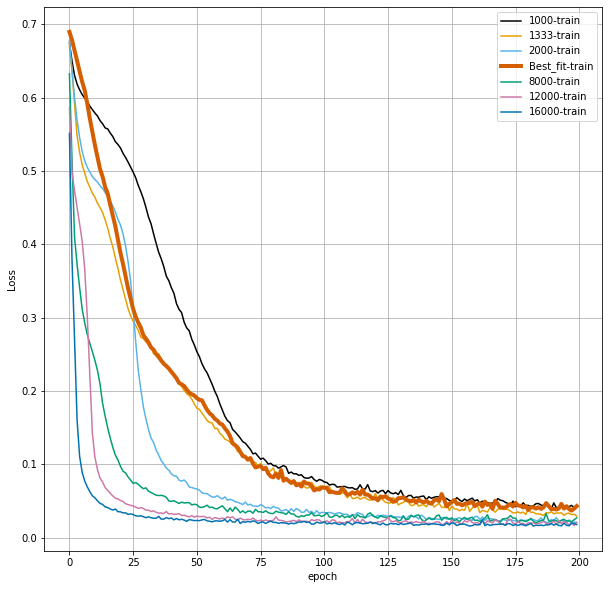

In [33]:
N_all = [N/4, N/3, N/2, N*2, N*3, N*4]
list_of_colors = ['#000000', '#E69F00', '#56B4E9', '#009E73', '#CC79A7', '#0072B2', '#D55E00'] # '#F0E442'
plt.figure(figsize=(10,10))
for j, n in enumerate(N_all):
    n = int(n)
    x_new, y_new = (np.random.random((n, 2))-0.5)*B, np.zeros(n)
    for i in range(n):
        y_new[i] = int(f(x_new[i]))
    x_new = simple_rescaling(x_new)

    n_train = int(n*80/100) #take 80% of data as training
    x_train, x_test = x_new[:n_train], x_new[n_train:]
    y_train, y_test = y_new[:n_train], y_new[n_train:]

    model = compile_model(optimizer=best_params['optimizer'], activation=best_params['activation'])
    fit = model.fit(x_train, y_train,
                epochs=epochs, batch_size=batch_size,
                validation_data=(x_test, y_test),
                verbose=1)
    plt.plot(fit.history['loss'], label=f"{n}-train", c=list_of_colors[j])
    if n == N/2:
        plt.plot(best_fit['loss'], label="Best_fit-train", lw=4, c=list_of_colors[-1])

plt.xlabel('epoch')
plt.ylabel("Loss")
plt.grid()    
plt.legend()
plt.show()   

## c) 
#### Our intention is now to shift the data. To do so, we make a simple assumption on the shift: if we have N points in a square of dimensions B * B, the average "area occupied" by each point will be $B^2/N$. We want the virtual data to be close to the original one, so we generated a random gaussian noise, centered on the original sample and with standard deviation $\sigma=\sqrt{\frac{B^2}{N}}$ 

[-0.90943605 -0.94451763] 0.0
[-0.07411065 -0.36344887] 1.0
[-0.5877971  -0.51860384] 0.0
[ 0.18220355 -0.61539162] 1.0
[-0.0183614  -0.31902066] 1.0


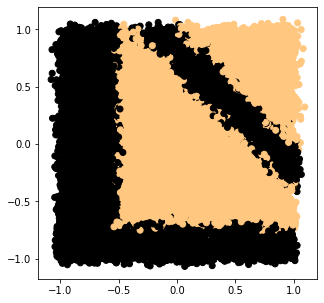

In [61]:
noise = np.zeros((N, 2))
x = (np.random.random((N, 2))-0.5)*B
Number_of_noises = 5
y = np.zeros(N)

for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = int(f(x[i]))

for _ in range(Number_of_noises):
    for i in range(noise.shape[0]):
        for j in range(noise.shape[1]):
            noise[i, j] = np.random.normal(loc=0., scale=np.sqrt(B**2/N))
    x_new = x[:N] + noise
    x, y = np.concatenate((x, x_new)), np.concatenate((y, y[:N]))
x = simple_rescaling(x)

for i in range(5):
    print(x[i], y[i])

plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

# 3.